# <span style = "color:brown"> Image Segmentation and the Watershed Algorithm</span>

***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
def display(img, cmap = None):
    plt.figure(figsize = (10,8))
    plt.imshow(img, cmap = cmap)

***

## Draw Contours around the coins

### Common coins Example

#### Naive Approach

Let's try to simply use a threshold and then use findContours

In [3]:
sep_coins = cv2.imread('coins.jpg')

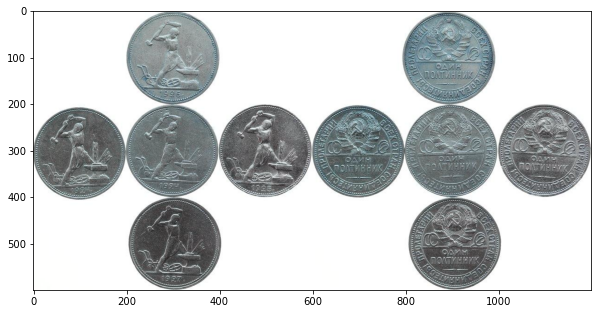

In [4]:
display(sep_coins)

### Apply Median Blurring

We have too much detail in this image, including light, the face edges on the coins, and too much detail in the background. Let's use Median Blur Filtering to blur the image a bit, which will be useful later on when we threshold.

In [5]:
sep_blur = cv2.medianBlur(sep_coins,25)

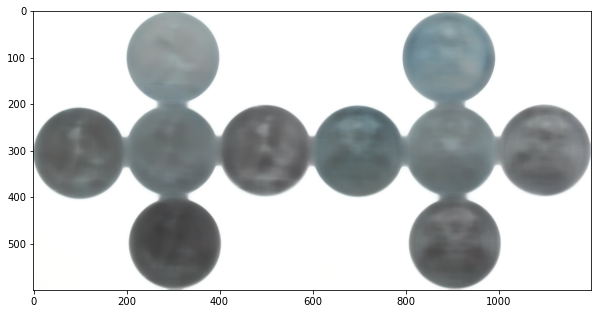

In [6]:
display(sep_blur)

#### Convert blurred image to Grayscale

In [7]:
gray_sep_coins = cv2.cvtColor(sep_blur,cv2.COLOR_BGR2GRAY)

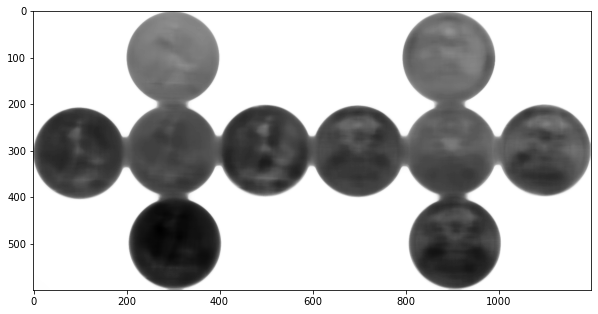

In [8]:
display(gray_sep_coins,cmap='gray')

### Binary Threshold

In [15]:
ret, sep_thresh = cv2.threshold(gray_sep_coins, 180,255, cv2.THRESH_BINARY_INV)

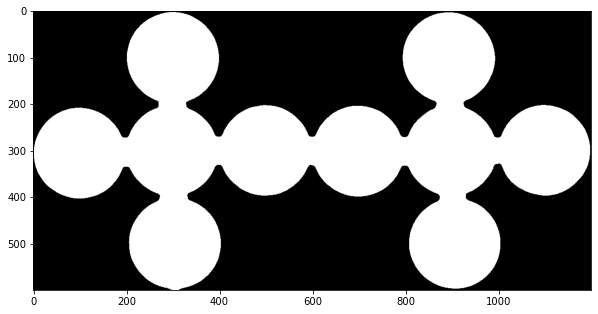

In [16]:
display(sep_thresh, cmap = 'gray')

### FindContours

In [17]:
contours, hierarchy = cv2.findContours(sep_thresh.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [18]:
# For every entry in contours
for i in range(len(contours)):
    
    # last column in the array is -1 if an external contour (no contours inside of it)
    if hierarchy[0][i][3] == -1:
        
        # We can now draw the external contours from the list of contours
        cv2.drawContours(sep_coins, contours, i, (255, 0, 0), 10)

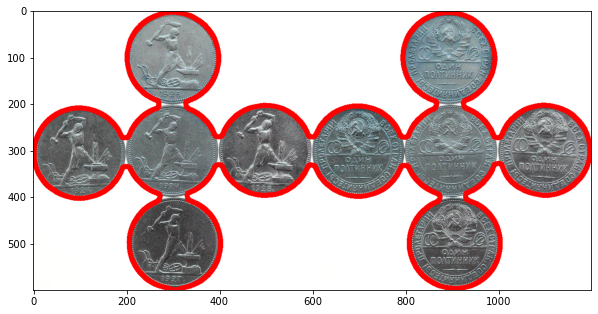

In [20]:
display(sep_coins)

## Watershed Algorithm

Let's now try the watershed algorithm apporach to draw contours around the pennies.

#### Step 1: Read Image

In [25]:
img = cv2.imread('coins.jpg')

#### Step 2: Apply Blur

In [26]:
img = cv2.medianBlur(img, 35)

#### Step 3: Convert to Grayscale

In [27]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#### Step 4: Apply Threshold (Inverse Binary with OTSU as well)

In [28]:
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

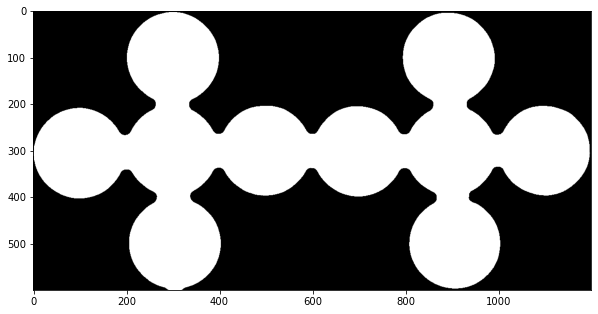

In [29]:
display(thresh, cmap = 'gray')

#### Optional Step 5: Noise Removal

In [30]:
kernel = np.ones((3,3))
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations = 2)

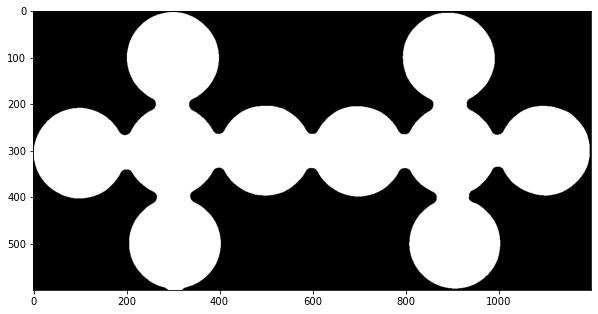

In [31]:
display(opening, cmap = 'gray')

#### Step 6: Grab Background that you are sure of

In [35]:
sure_bg = cv2.dilate(opening, kernel , iterations = 3)

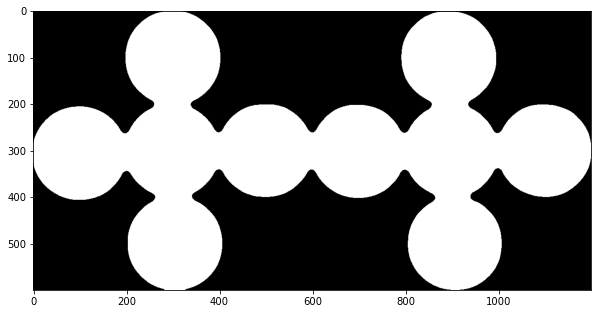

In [36]:
display(sure_bg, cmap = 'gray')

### Distance Transform

In [37]:
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)

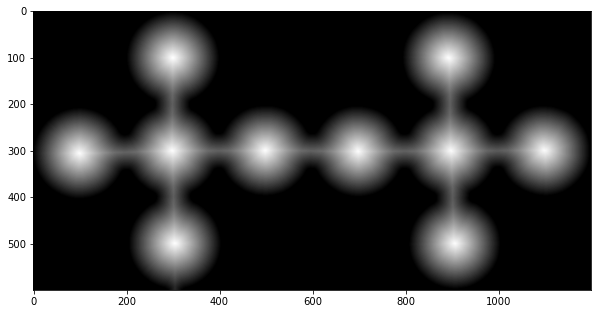

In [38]:
display(dist_transform, cmap = 'gray')

#### Step 7: Find sure Foreground

In [39]:
ret, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)

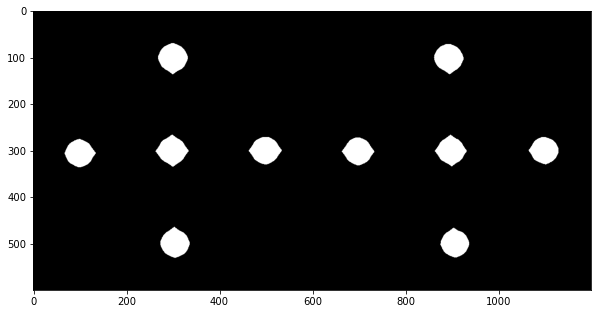

In [31]:
display(sure_fg, cmap = 'gray')

#### Find unknown Region

In [44]:
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

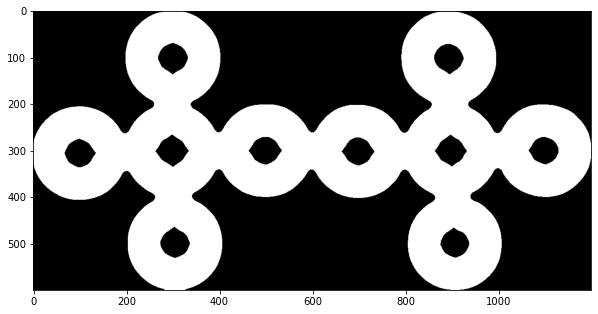

In [45]:
display(unknown, cmap = 'gray')

#### Step 9: Label markers of sure Foreground

In [48]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

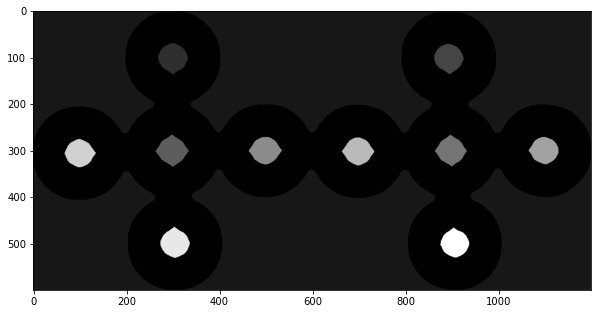

In [49]:
display(markers, cmap = 'gray')

#### Step 10: Apply watershed Algorithm to find Markers

In [50]:
markers = cv2.watershed(img, markers)

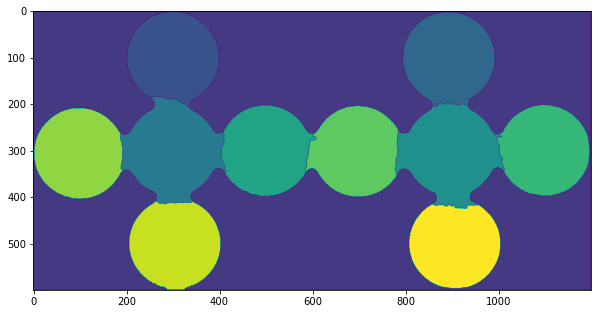

In [51]:
display(markers)

#### Step 11: Find contours on Markers

In [39]:
contours, hierarchy = cv2.findContours(markers.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

# For every entry in contours
for i in range(len(contours)):
    
    # last column in the array is -1 if an external contour (no contours inside of it)
    if hierarchy[0][i][3] == -1:
        
        # We can now draw the external contours from the list of contours
        cv2.drawContours(sep_coins, contours, i, (255, 0, 0), 10)

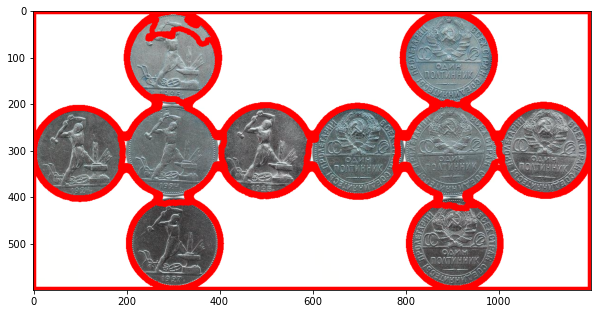

In [41]:
display(sep_coins)

***